## Parte 1 (R): Média Salarial por Competência

nr_comp_movim,cd_mun,cd_cnae_subclasse,nr_saldo_movim,cd_cbo_ocup,nr_cat,nr_grau_inst,nr_idade,qt_hr_contr,nr_raca_cor,⋯,nr_porte_emp,nr_ind_aprendiz,nr_origem_info,nr_comp_declar,nr_comp_exc_info,nr_ind_fora_prazo,nr_ind_exc,nr_un_sal,vl_sal_fixo,qt_tempo_emp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
202401,353440,8800600,-1,317110,103,6,20,30,3,⋯,6,1,1,202401,0,0,0,1,6.42,0
202401,350570,7020400,-1,212405,101,8,40,44,1,⋯,10,0,1,202401,0,0,0,5,7238.00,0
202401,430480,8211300,1,317110,101,8,20,44,1,⋯,7,0,1,202401,0,0,0,5,4065.60,0
202401,355030,7490104,1,212405,101,7,28,40,6,⋯,8,0,1,202401,0,0,0,5,15000.00,0
202401,411520,6202300,-1,317110,101,9,35,44,1,⋯,5,0,1,202401,0,0,0,5,2700.02,0
202401,420420,6201501,1,317110,101,8,18,44,1,⋯,5,0,1,202401,0,0,0,5,1797.00,0


tibble [96,755 × 28] (S3: tbl_df/tbl/data.frame)
 $ nr_comp_movim    : num [1:96755] 202401 202401 202401 202401 202401 ...
 $ cd_mun           : num [1:96755] 353440 350570 430480 355030 411520 ...
 $ cd_cnae_subclasse: num [1:96755] 8800600 7020400 8211300 7490104 6202300 ...
 $ nr_saldo_movim   : num [1:96755] -1 -1 1 1 -1 1 1 1 -1 -1 ...
 $ cd_cbo_ocup      : num [1:96755] 317110 212405 317110 212405 317110 ...
 $ nr_cat           : num [1:96755] 103 101 101 101 101 101 101 101 101 101 ...
 $ nr_grau_inst     : num [1:96755] 6 8 8 7 9 8 9 10 9 8 ...
 $ nr_idade         : num [1:96755] 20 40 20 28 35 18 27 27 27 23 ...
 $ qt_hr_contr      : num [1:96755] 30 44 44 40 44 44 40 40 40 40 ...
 $ nr_raca_cor      : num [1:96755] 3 1 1 6 1 1 6 1 1 3 ...
 $ nr_sexo          : num [1:96755] 1 1 1 3 1 1 1 3 1 1 ...
 $ nr_tipo_empr     : num [1:96755] 0 0 0 0 0 0 0 0 0 0 ...
 $ nr_tipo_estab    : num [1:96755] 1 1 1 1 1 1 1 1 1 1 ...
 $ nr_tipo_movim    : num [1:96755] 40 40 97 97 31 97 97 97 

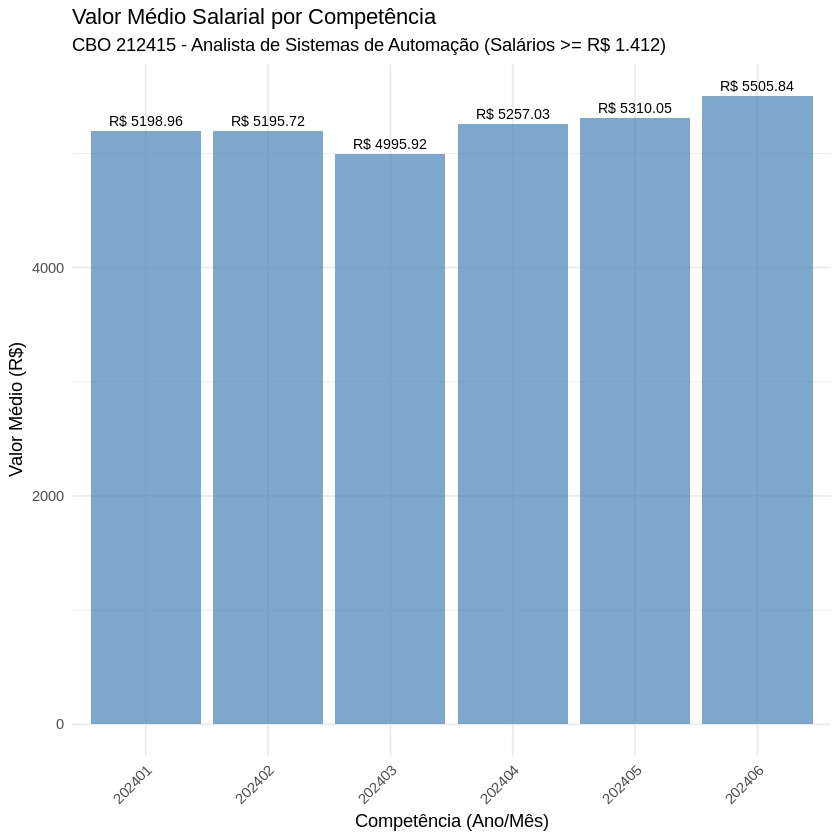

In [5]:

if (!require(readxl)) install.packages("readxl")
if (!require(dplyr)) install.packages("dplyr")
if (!require(ggplot2)) install.packages("ggplot2")

library(readxl)
library(dplyr)
library(ggplot2)

# os dados enviados para o case da FGV
dados <- read_excel("DADOS.xlsx")


head(dados)
str(dados)

# salário mínimo 2024 definição
salario_minimo <- 1412.00

# parte 1: Filtrar dados para CBO 212415 e salários >= salário mínimo
dados_filtrados <- dados %>%
  filter(cd_cbo_ocup == 212415,
         vl_sal_mes >= salario_minimo)

# valor médio por competência
resultado_parte1 <- dados_filtrados %>%
  group_by(nr_comp_movim) %>%
  summarise(
    qtd_registros = n(),
    valor_medio = mean(vl_sal_mes, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(nr_comp_movim)


print("=== PARTE 1 - RESULTADOS ===")
print(resultado_parte1)

# gráfico dos valores médios por mês
ggplot(resultado_parte1, aes(x = factor(nr_comp_movim), y = valor_medio)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.7) +
  geom_text(aes(label = paste0("R$ ", round(valor_medio, 2))),
            vjust = -0.5, size = 3) +
  labs(
    title = "Valor Médio Salarial por Competência",
    subtitle = "CBO 212415 - Analista de Sistemas de Automação (Salários >= R$ 1.412)",
    x = "Competência (Ano/Mês)",
    y = "Valor Médio (R$)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# salvar resultados para a parte 2
write.csv(resultado_parte1, "resultado_parte1.csv", row.names = FALSE)


print("\nDados preparados para Parte 2...")
print(paste("Competências analisadas:", nrow(resultado_parte1)))
